In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('transactions.csv')

if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    
df['prix_m2'] = df['prix'] / (df['surface_habitable'])

In [4]:
paris_df = df[(df.departement == 75) & (df.n_pieces == 4) & (df.date_transaction.str.startswith('2022-'))].copy()
surface_cols = [c for c in paris_df.columns if 'surface_' in c and c != 'surface_habitable']
for c in surface_cols:
    paris_df[c + '_sum'] = paris_df[c].apply(lambda x: sum(eval(x)) if 'NULL' not in x else 0)
paris_df = paris_df[paris_df[[c + '_sum' for c in surface_cols]].sum(axis=1) == 0]

In [5]:
paris_df.head()

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,...,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,prix_m2,surface_dependances_sum,surface_locaux_industriels_sum,surface_terrains_agricoles_sum,surface_terrains_sols_sum,surface_terrains_nature_sum
6044001,10069282,2022-01-03,1275900.0,75,111,PARIS 11,75011,22 RUE OBERKAMPF,Appartement,False,...,{},{},{},{},14665.517241,0,0,0,0,0
6044016,10044210,2022-01-03,1330000.0,75,116,PARIS 16,75016,35 BD DE BEAUSEJOUR,Appartement,False,...,{},{},{},{},11083.333333,0,0,0,0,0
6044024,10057293,2022-01-04,951465.0,75,119,PARIS 19,75019,47 AV MATHURIN MOREAU,Appartement,False,...,{},{},{},{},8649.681818,0,0,0,0,0
6044026,10043288,2022-01-04,560000.0,75,112,PARIS 12,75012,117 AV DU GAL MICHEL BIZOT,Appartement,False,...,{},{},{},{},8615.384615,0,0,0,0,0
6044041,10056347,2022-01-04,820000.0,75,115,PARIS 15,75015,10 RUE BEATRIX DUSSANE,Appartement,False,...,{},{},{},{},11714.285714,0,0,0,0,0


In [6]:
paris_df.shape

(3659, 26)

In [7]:
X = paris_df[['longitude', 'latitude']].values
y = paris_df['prix_m2'].values

In [8]:
X

array([[ 2.36988532, 48.86321791],
       [ 2.26898741, 48.85697231],
       [ 2.37637303, 48.87897605],
       ...,
       [ 2.35713171, 48.82910049],
       [ 2.33472701, 48.85545328],
       [ 2.33382336, 48.87932351]])

In [9]:
y

array([14665.51724138, 11083.33333333,  8649.68181818, ...,
        8526.31578947,   372.54901961, 14500.        ])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train

array([[ 2.31521687, 48.82896064],
       [ 2.32361639, 48.89017606],
       [ 2.2966219 , 48.87911454],
       ...,
       [ 2.38395431, 48.88576556],
       [ 2.3431369 , 48.8666246 ],
       [ 2.27672741, 48.84478637]])

In [12]:
X_train

array([[ 2.31521687, 48.82896064],
       [ 2.32361639, 48.89017606],
       [ 2.2966219 , 48.87911454],
       ...,
       [ 2.38395431, 48.88576556],
       [ 2.3431369 , 48.8666246 ],
       [ 2.27672741, 48.84478637]])

In [13]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3659, 2) (3659,)
(2927, 2) (2927,)
(732, 2) (732,)


<Axes: >

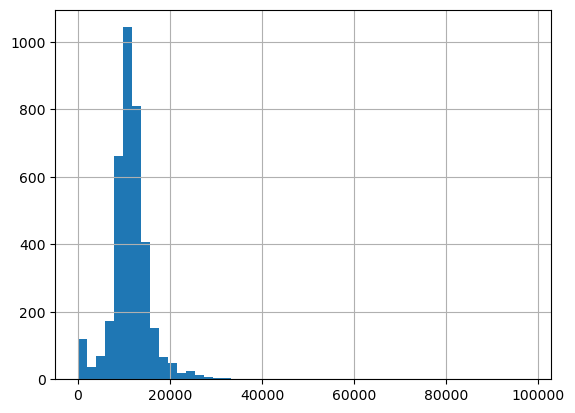

In [14]:
paris_df.prix_m2.hist(bins=50)

In [15]:
paris_df[paris_df.prix_m2 > 50000]

,id_transaction,date_transaction,prix,departement,id_ville,ville,code_postal,adresse,type_batiment,vefa,...,surface_locaux_industriels,surface_terrains_agricoles,surface_terrains_sols,surface_terrains_nature,prix_m2,surface_dependances_sum,surface_locaux_industriels_sum,surface_terrains_agricoles_sum,surface_terrains_sols_sum,surface_terrains_nature_sum
6048796,10057507,2022-02-25,9200000.0,75,106,PARIS 06,75006,5 QUAI MALAQUAIS,Appartement,False,...,{},{},{},{},97872.340426,0,0,0,0,0


In [16]:
paris_df[paris_df.id_transaction == 10056535].to_dict()

{'id_transaction': {},
 'date_transaction': {},
 'prix': {},
 'departement': {},
 'id_ville': {},
 'ville': {},
 'code_postal': {},
 'adresse': {},
 'type_batiment': {},
 'vefa': {},
 'n_pieces': {},
 'surface_habitable': {},
 'id_parcelle_cadastre': {},
 'latitude': {},
 'longitude': {},
 'surface_dependances': {},
 'surface_locaux_industriels': {},
 'surface_terrains_agricoles': {},
 'surface_terrains_sols': {},
 'surface_terrains_nature': {},
 'prix_m2': {},
 'surface_dependances_sum': {},
 'surface_locaux_industriels_sum': {},
 'surface_terrains_agricoles_sum': {},
 'surface_terrains_sols_sum': {},
 'surface_terrains_nature_sum': {}}

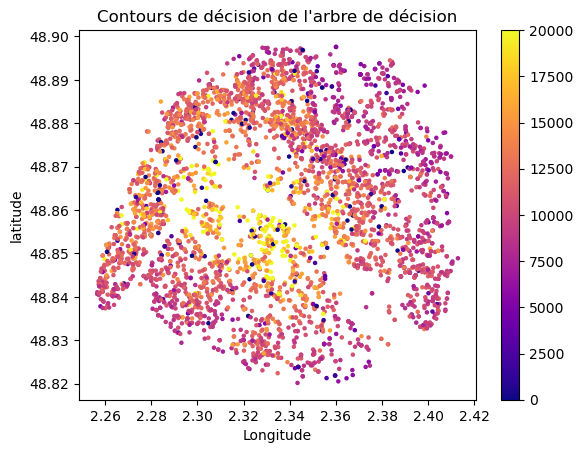

In [17]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

plt.scatter(paris_df['longitude'], paris_df['latitude'], c = paris_df.prix_m2, s=5, cmap="plasma", vmin=000, vmax=20000)
plt.title("Contours de décision de l'arbre de décision")
plt.xlabel("Longitude")
plt.ylabel("latitude")
plt.colorbar()



In [18]:
import numpy as np

def plot_with_contour(model, X, y):
    
    # Visualisation des contours de décision
    x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
    y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                         np.arange(y_min, y_max, 0.001))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=1, cmap='coolwarm')
    
    # Normalize the colormap to ignore extreme values
    # sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=0, vmax=20_2000,
    #                 marker='o', s=5, linewidth=1, cmap='coolwarm')
    
    sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=np.percentile(y, 5), vmax=np.percentile(y, 95), 
                     marker='o', s=5, linewidth=1, cmap='coolwarm')
    
    
    plt.colorbar(sc, label='prix m2', orientation='vertical')
    
    
    plt.title("Contours de décision de l'arbre de décision" )
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

Text(0, 0.5, 'latitude')

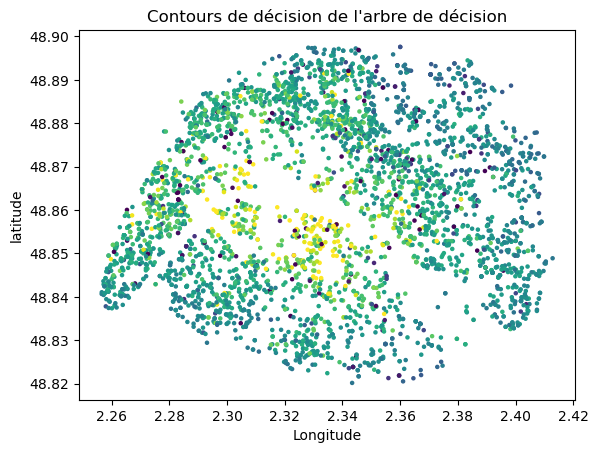

In [19]:
plt.scatter(paris_df['longitude'], paris_df['latitude'], c = paris_df['prix_m2'], s=5, vmin=000, vmax=20000)
plt.title("Contours de décision de l'arbre de décision")
plt.xlabel("Longitude")
plt.ylabel("latitude")

In [20]:
model_DTR = DecisionTreeRegressor(max_depth=4)
model_DTR.fit(X, y)

DecisionTreeRegressor(max_depth=4)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
model_sklearn_KN = KNeighborsRegressor(n_neighbors=50)
model_sklearn_KN.fit(X, y)

KNeighborsRegressor(n_neighbors=50)

In [22]:
from sklearn.linear_model import LinearRegression
model_sklearn_LR = LinearRegression()
model_sklearn_LR.fit(X, y)

LinearRegression()

In [23]:
from sklearn.ensemble import RandomForestRegressor
model_sklearn_RFR = RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)
model_sklearn_RFR.fit(X, y)

RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)

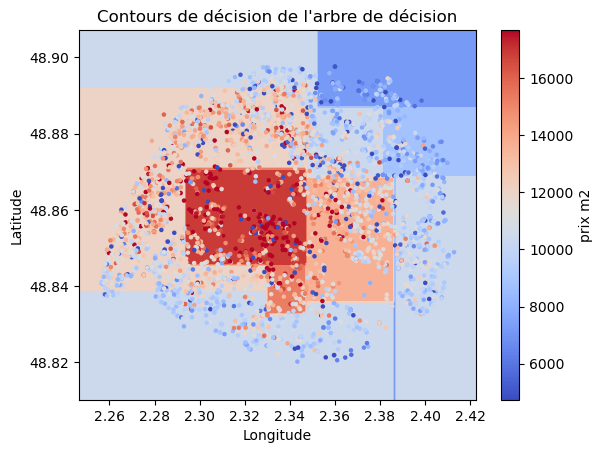

In [24]:
plot_with_contour(model_DTR, X, y)

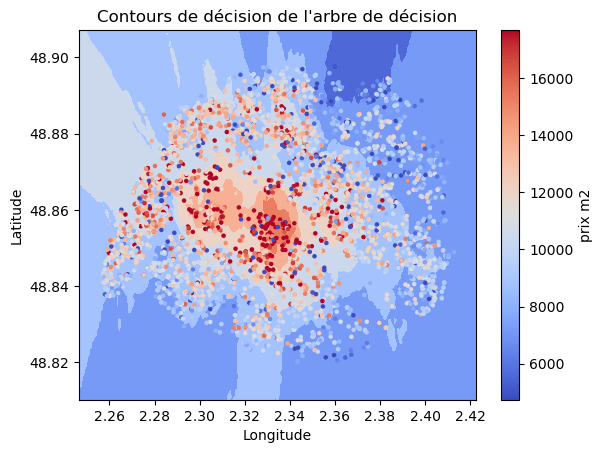

In [25]:
plot_with_contour(model_sklearn_KN, X, y)

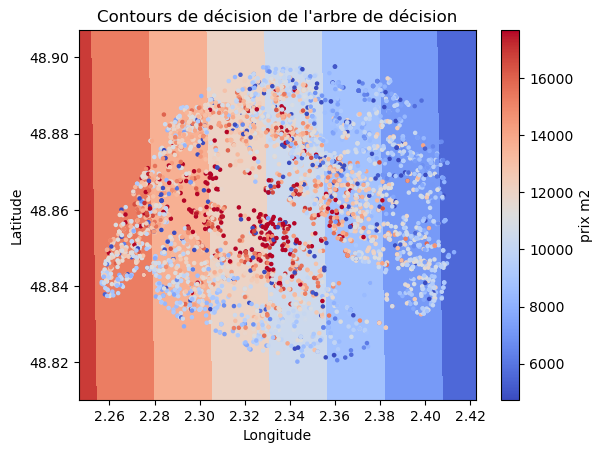

In [26]:
plot_with_contour(model_sklearn_LR, X, y)

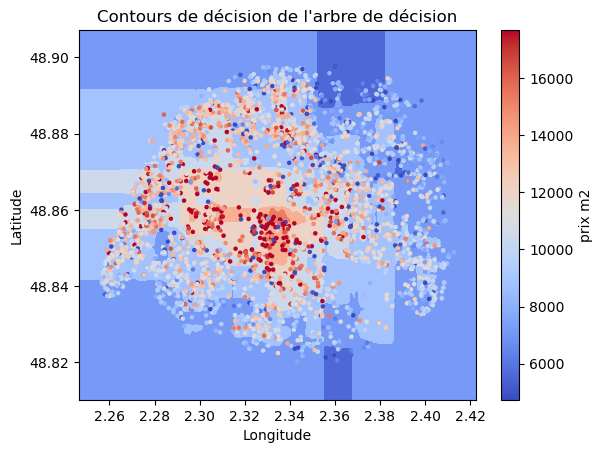

In [27]:
plot_with_contour(model_sklearn_RFR, X, y)

In [28]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, model_DTR.predict(X)))

3830.5137615637145

In [29]:
np.sqrt(mean_squared_error(y, model_sklearn_RFR.predict(X)))

3361.402923922923

In [30]:
np.sqrt(mean_squared_error(y, model_sklearn_LR.predict(X)))

4261.349328234232

In [31]:
np.sqrt(mean_squared_error(y, model_sklearn_KN.predict(X)))

3731.8971142140995

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

m = {DecisionTreeRegressor(max_depth=100), KNeighborsRegressor(n_neighbors=50), LinearRegression(), RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)}

for model in m:
    model.fit(X_train, y_train)
    # plot_with_contour(model, X, y)
    print (f"modele : {model}")
    print(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    print(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))


modele : DecisionTreeRegressor(max_depth=100)
1137.2610975997316
4944.253795862425
modele : RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)
3488.2824168272346
3319.7331916717094
modele : LinearRegression()
4352.736364506186
3876.8015333318945
modele : KNeighborsRegressor(n_neighbors=50)
3859.487880393906
3339.6355751026654


In [33]:
from sklearn.model_selection import GridSearchCV

params_grid = {
                'LR': {
                    'model': LinearRegression(),
                    'params': {
                        'fit_intercept': [True, False],
                        'positive': [True, False],
                    }
                },
                'DTR': {
                    'model': DecisionTreeRegressor(),
                    'params': {
                        'max_depth': [1, 5, 10],
                        'min_samples_leaf': [5, 10, 20, 50, 100]
                    }
                },
                'RFR': {
                    'model' : RandomForestRegressor(),
                    'params': {
                        'max_depth' : [50, 100, 150],
                        'min_samples_leaf': [20, 50],
                        'n_estimators': [500, 1000]

                    }
                }

            }

for model_name, model_config in params_grid.items():
    gs = GridSearchCV(estimator=model_config['model'], 
                      param_grid=model_config['params'],
                
                      )
    gs.fit(X_train, y_train)
    print(f'Modèle: {model_name} avec params optimaux: {gs.best_params_} donne erreur =')
    print(np.sqrt(mean_squared_error(y_test, gs.best_estimator_.predict(X_test))))

Modèle: LR avec params optimaux: {'fit_intercept': False, 'positive': False} donne erreur =
3876.875872111938
Modèle: DTR avec params optimaux: {'max_depth': 10, 'min_samples_leaf': 50} donne erreur =
3434.9549817022653
Modèle: RFR avec params optimaux: {'max_depth': 100, 'min_samples_leaf': 20, 'n_estimators': 500} donne erreur =
3328.8937908919065


In [34]:
# plt.figure(figsize=(15, 15))
# plot_tree(model, feature_names=['latitude', 'longitude'], fontsize=10)
# plt.show()

In [41]:
import pickle
from pprint import pprint

In [42]:
optimal_rfr_model = RandomForestRegressor(max_depth=100, min_samples_leaf=20, n_estimators=500)
optimal_rfr_model.fit(X_train, y_train)

pickle.dump(optimal_rfr_model, open('optimal_rfr_model.pkl', 'wb'))

In [37]:
reloaded_model = pickle.load(open('decision_tree_model.pkl', 'rb'))

In [38]:
reloaded_model.predict([[43.33, 2.3889]])

array([9108.33194898])

In [39]:
one_sample[['latitude', 'longitude']].values

NameError: name 'one_sample' is not defined

In [ ]:
one_sample = paris_df.sample()[['prix_m2', 'adresse', 'latitude', 'longitude']]
pprint(one_sample)
print(reloaded_model.predict(one_sample[['latitude', 'longitude']].values))

             prix_m2       adresse   latitude  longitude
6049670  8947.368421  42 BD ORNANO  48.894391   2.347657
[8947.36842105]
